In [1]:
import pandas as pd

# Load CSV from data folder
df = pd.read_csv("../data/DailyDelhiClimateTrain.csv")  # '../' moves up one folder

# Quick overview
print(df.head())
print(df.info())


    date   meantemp   humidity  wind_speed  meanpressure
0  41275  10.000000  84.500000    0.000000   1015.666667
1  41276   7.400000  92.000000    2.980000   1017.800000
2  41277   7.166667  87.000000    4.633333   1018.666667
3  41278   8.666667  71.333333    1.233333   1017.166667
4  41279   6.000000  86.833333    3.700000   1016.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   int64  
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 57.2 KB
None


In [2]:
import os

for root, dirs, files in os.walk(".."):
    level = root.replace("..", "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 4 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")


../
    README.md
    data/
        Cleaned_DailyDelhiClimate.csv
        DailyDelhiClimateTrain.csv
    images/
        Daily_Temperature.png
        Humidity_vs_Temperature.png
        Monthly_Temperature.png
        Temp_Humidity_Combined.png
    notebook/
        Weather_Analysis.ipynb
        .ipynb_checkpoints/
            Weather_Analysis-checkpoint.ipynb
    report/
        Summary.md
        .ipynb_checkpoints/
            Summary-checkpoint.md


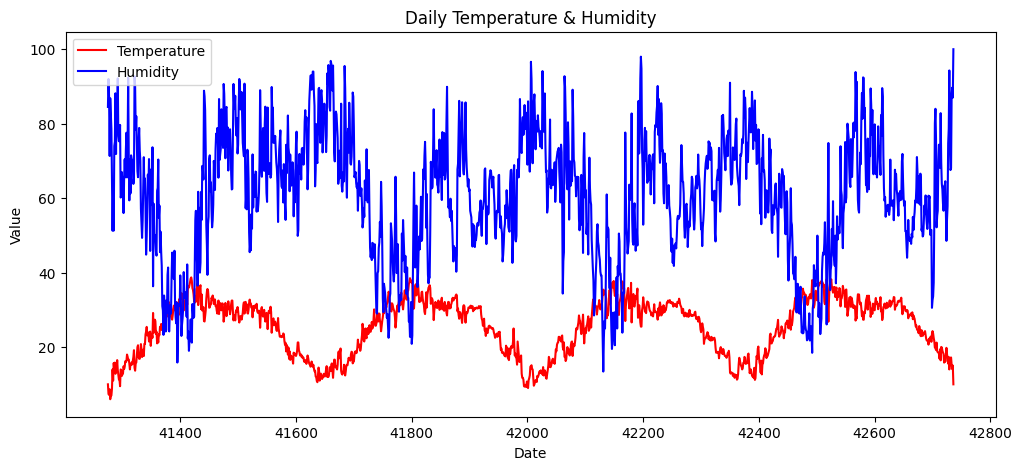

In [3]:
import matplotlib.pyplot as plt

# Combined Plot: Temperature & Humidity
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['meantemp'], label='Temperature', color='red')
plt.plot(df['date'], df['humidity'], label='Humidity', color='blue')
plt.title("Daily Temperature & Humidity")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()

# Save the plot to images folder
plt.savefig("../images/Temp_Humidity_Combined.png")
plt.show()


In [4]:
# Convert Excel serial date to datetime
df['date'] = pd.to_datetime(df['date'], unit='d', origin='1899-12-30')

# Check the first 5 rows
print(df.head())


TypeError: Invalid datetime unit in metadata string "[d]"

In [ ]:
import pandas as pd

# Convert Excel serial date to datetime
df['date'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df['date'], unit='D')

# Check first 5 rows
print(df.head())


In [ ]:
# Keep only relevant columns
df = df[['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure']]

# Quick check
print(df.head())
print(df.info())


In [ ]:
import numpy as np

# Daily statistics
print("Mean Temperature:", np.mean(df['meantemp']))
print("Max Temperature:", np.max(df['meantemp']))
print("Min Temperature:", np.min(df['meantemp']))
print("Temperature Std Dev:", np.std(df['meantemp']))

# You can do the same for humidity, wind_speed, and meanpressure
print("\nMean Humidity:", np.mean(df['humidity']))
print("Max Humidity:", np.max(df['humidity']))
print("Min Humidity:", np.min(df['humidity']))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line chart: Daily Temperature
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['meantemp'], color='red')
plt.title("Daily Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()

# Scatter plot: Humidity vs Temperature
plt.figure(figsize=(8,5))
plt.scatter(df['humidity'], df['meantemp'], color='blue')
plt.title("Humidity vs Temperature")
plt.xlabel("Humidity (%)")
plt.ylabel("Temperature (°C)")
plt.show()

# Bar chart: Monthly Mean Temperature
df['month'] = df['date'].dt.month
monthly_mean = df.groupby('month')['meantemp'].mean()
plt.figure(figsize=(10,5))
monthly_mean.plot(kind='bar', color='orange')
plt.title("Average Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line chart: Daily Temperature
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['meantemp'], color='red')
plt.title("Daily Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()


In [ ]:
import pandas as pd

# Load CSV from data folder
df = pd.read_csv("../data/DailyDelhiClimateTrain.csv")

# Convert Excel serial date to datetime
df['date'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df['date'], unit='D')

# Keep relevant columns
df = df[['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure']]

# Check
print(df.head())


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line chart: Daily Temperature
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['meantemp'], color='red')
plt.title("Daily Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()


In [ ]:
# Scatter plot: Humidity vs Temperature
plt.figure(figsize=(8,5))
plt.scatter(df['humidity'], df['meantemp'], color='blue', alpha=0.6)
plt.title("Humidity vs Temperature")
plt.xlabel("Humidity (%)")
plt.ylabel("Temperature (°C)")
plt.show()


In [ ]:
# Extract month from date
df['month'] = df['date'].dt.month

# Group by month and calculate mean temperature
monthly_mean = df.groupby('month')['meantemp'].mean()

# Bar chart
plt.figure(figsize=(10,5))
monthly_mean.plot(kind='bar', color='orange')
plt.title("Average Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.show()


In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['meantemp'], label='Temperature', color='red')
plt.plot(df['date'], df['humidity'], label='Humidity', color='blue')
plt.title("Daily Temperature & Humidity")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


In [ ]:
# Export cleaned data
df.to_csv("../data/Cleaned_DailyDelhiClimate.csv", index=False)
print("Cleaned dataset saved to data/Cleaned_DailyDelhiClimate.csv")


In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['meantemp'], color='red')
plt.title("Daily Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.savefig("../images/Daily_Temperature.png")
plt.show()


In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['meantemp'], color='red')
plt.title("Daily Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.savefig("../images/Daily_Temperature.png")
plt.show()


In [ ]:
# Scatter: Humidity vs Temperature
plt.figure(figsize=(8,5))
plt.scatter(df['humidity'], df['meantemp'], color='blue', alpha=0.6)
plt.title("Humidity vs Temperature")
plt.xlabel("Humidity (%)")
plt.ylabel("Temperature (°C)")
plt.savefig("../images/Humidity_vs_Temperature.png")
plt.show()

# Bar chart: Average Monthly Temperature
monthly_mean = df.groupby(df['date'].dt.month)['meantemp'].mean()
plt.figure(figsize=(10,5))
monthly_mean.plot(kind='bar', color='orange')
plt.title("Average Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.savefig("../images/Monthly_Temperature.png")
plt.show()


In [ ]:
df.to_csv("../data/Cleaned_DailyDelhiClimate.csv", index=False)


In [ ]:
df.to_csv("../data/Cleaned_DailyDelhiClimate.csv", index=False)


# Exploratory Data Analysis of Daily Climate in Delhi

**Dataset:** Daily Delhi Climate data (Temperature, Humidity, Wind Speed, Pressure)  
**Period:** 5 years  

## Insights:
- Temperature rises in summer months and falls in winter.
- Humidity shows some correlation with temperature.
- Monthly average temperature trends show seasonal patterns.
- Wind speed and pressure show minor fluctuations.

## Visualizations:
1. **Daily Mean Temperature**: Shows overall trend across years.
2. **Humidity vs Temperature**: Indicates relationship between humidity and temperature.
3. **Average Monthly Temperature**: Displays seasonal temperature variation.
4. **Combined Plot (Temperature & Humidity)**: Helps visualize correlation over time.


In [ ]:
# Exploratory Data Analysis of Daily Climate in Delhi

**Dataset:** Daily Delhi Climate data (Temperature, Humidity, Wind Speed, Pressure)  
**Period:** 5 years  

## Insights:
- Temperature rises in summer months and falls in winter.
- Humidity shows some correlation with temperature.
- Monthly average temperature trends show seasonal patterns.
- Wind speed and pressure show minor fluctuations.

## Visualizations:
1. **Daily Mean Temperature**: Shows overall trend across years.
2. **Humidity vs Temperature**: Indicates relationship between humidity and temperature.
3. **Average Monthly Temperature**: Displays seasonal temperature variation.
4. **Combined Plot (Temperature & Humidity)**: Helps visualize correlation over time.


In [ ]:
# Exploratory Data Analysis of Daily Climate in Delhi

**Dataset:** Daily Delhi Climate data (Temperature, Humidity, Wind Speed, Pressure)  
**Period:** 5 years  

## Insights:
- Temperature rises in summer months and falls in winter.
- Humidity shows some correlation with temperature.
- Monthly average temperature trends show seasonal patterns.
- Wind speed and pressure show minor fluctuations.

## Visualizations:
1. **Daily Mean Temperature**: Shows overall trend across years.
2. **Humidity vs Temperature**: Indicates relationship between humidity and temperature.
3. **Average Monthly Temperature**: Displays seasonal temperature variation.
4. **Combined Plot (Temperature & Humidity)**: Helps visualize correlation over time.


# Exploratory Data Analysis of Daily Climate in Delhi

**Dataset:** Daily Delhi Climate data (Temperature, Humidity, Wind Speed, Pressure)  
**Period:** 5 years  

## Insights:
- Temperature rises in summer months and falls in winter.
- Humidity shows some correlation with temperature.
- Monthly average temperature trends show seasonal patterns.
- Wind speed and pressure show minor fluctuations.

## Visualizations:
1. **Daily Mean Temperature**: Shows overall trend across years.
2. **Humidity vs Temperature**: Indicates relationship between humidity and temperature.
3. **Average Monthly Temperature**: Displays seasonal temperature variation.
4. **Combined Plot (Temperature & Humidity)**: Helps visualize correlation over time.


In [ ]:
import matplotlib.pyplot as plt

# Combined Plot: Temperature & Humidity
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['meantemp'], label='Temperature', color='red')
plt.plot(df['date'], df['humidity'], label='Humidity', color='blue')
plt.title("Daily Temperature & Humidity")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()

# Save the plot to images folder
plt.savefig("../images/Temp_Humidity_Combined.png")
plt.show()


In [ ]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv("../data/Cleaned_DailyDelhiClimate.csv")

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Quick check
print(df.head())


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['date'], df['meantemp'], label='Temperature', color='red')
plt.plot(df['date'], df['humidity'], label='Humidity', color='blue')
plt.title("Daily Temperature & Humidity")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.savefig("../images/Temp_Humidity_Combined.png")
plt.show()


In [ ]:
import numpy as np

# Daily statistics
daily_mean = np.mean(df['meantemp'])
daily_min = np.min(df['meantemp'])
daily_max = np.max(df['meantemp'])
daily_std = np.std(df['meantemp'])

print("Daily Mean Temperature:", daily_mean)
print("Daily Min Temperature:", daily_min)
print("Daily Max Temperature:", daily_max)
print("Daily Std Deviation:", daily_std)

# Monthly statistics
monthly_stats = df.resample('M', on='date')['meantemp'].agg(['mean', 'min', 'max', 'std'])
monthly_stats
